### All Data: Consensus Genotype
Size_Sample_Insertions_AllData_6000

* Size Ranges
* Training Dataset size : 6000

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


***
Training Set

Count : 6000
*** 

In [2]:
# Import Training Data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.INS.test.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/6k.INS.test.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.shape

(3182, 188)

In [3]:
train_set = pd.DataFrame()
train_set = df_train_2

In [4]:
train_set['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
train_set['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
train_set['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)

** Count of Labels in Training Set **

<a id='imbalance'></a>

In [5]:
pd.value_counts(train_set['GTcons'].values, sort=False)

Homozygous_Variant      1014
Heterozygous_Variant    1378
Homozygous_Reference     790
dtype: int64

In [6]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)
df_train.drop(['New_ID'], axis=1, inplace = True)

In [7]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)

***
Test Set

Size separated
***

<a id='hom_ref'></a>

In [8]:
# Import Test Data
# SVanalyzer generated training data
df_test_size = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/All_size_sample_TestSet.csv')
df_test_size_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/new_sizeSample_testSet/INS/All_size_sample_TestSet.csv')
df_test_size.rename(columns={'size': 'Size'}, inplace=True)
df_test_size.shape

(1039, 188)

In [9]:
### Drop columns that are not shared by both dataframes
df_test_size.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test_size.drop(['Ill250.GT'], axis=1, inplace = True)
df_test_size.drop(['IllMP.GT'], axis=1, inplace = True)
df_test_size.drop(['TenX.GT'], axis=1, inplace = True)
df_test_size.drop(['pacbio.GT'], axis=1, inplace = True)
df_test_size.drop(['GTconflict'], axis=1, inplace = True)
df_test_size.drop(['GTsupp'], axis=1, inplace = True)
df_test_size.drop(['sample'], axis=1, inplace = True)
df_test_size.drop(['SVtype'], axis=1, inplace = True)
df_test_size.drop(['type'], axis=1, inplace = True)
df_test_size.drop(['id'], axis=1, inplace = True)
df_test_size.drop(['New_ID'], axis=1, inplace = True)

In [10]:
df_test_size.head(1)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,977.521739,7.329924,23.0,417.173913,82.969168,23.0,0.0,888.705882,166.36645,...,11649.10345,4516.179216,29.0,0,0,0,0.0,2986553,0,0.0


In [11]:
df_test_size['chrom'].replace('X', 23, inplace=True)
df_test_size['chrom'].replace('Y', 24, inplace=True)

***
Impute missing values using KNN
***

In [12]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,...,0.0,0.0,0.0,0,0,0,0.0,919991,1,1.0
1,2,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,...,0.0,0.0,0.0,0,0,0,0.0,919991,1,1.0
2,2,962.019608,14.772112,51.0,415.000000,81.200068,51.0,0.0,866.634831,146.493457,...,0.0,0.0,0.0,0,0,0,0.0,920006,1,1.0


In [13]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/3182 with 0 missing, elapsed time: 8.453
Imputing row 101/3182 with 0 missing, elapsed time: 8.453
Imputing row 201/3182 with 0 missing, elapsed time: 8.456
Imputing row 301/3182 with 0 missing, elapsed time: 8.460
Imputing row 401/3182 with 0 missing, elapsed time: 8.468
Imputing row 501/3182 with 0 missing, elapsed time: 8.470
Imputing row 601/3182 with 0 missing, elapsed time: 8.471
Imputing row 701/3182 with 4 missing, elapsed time: 8.514
Imputing row 801/3182 with 4 missing, elapsed time: 8.532
Imputing row 901/3182 with 4 missing, elapsed time: 8.552
Imputing row 1001/3182 with 4 missing, elapsed time: 8.572
Imputing row 1101/3182 with 4 missing, elapsed time: 8.591
Imputing row 1201/3182 with 59 missing, elapsed time: 8.625
Imputing row 1301/3182 with 6 missing, elapsed time: 8.669
Imputing row 1401/3182 with 6 missing, elapsed time: 8.696
Imputing row 1501/3182 with 6 missing, elapsed time: 8.720
Imputing row 1601/3182 with 6 missing, elapsed time: 8.746
Imputing

In [14]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2.0,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
1,2.0,958.307692,17.827742,52.0,403.673077,79.999452,52.0,0.0,867.666667,144.039804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,919991.0,1.0,1.0
2,2.0,962.019608,14.772112,51.0,415.000000,81.200068,51.0,0.0,866.634831,146.493457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920006.0,1.0,1.0


In [15]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [16]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

2.0    1014
1.0    1378
0.0     790
dtype: int64

In [17]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [18]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [19]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [20]:
# Train Random Forest Classifier
model = RandomForestClassifier(oob_score=True) 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [21]:
print('The OOB prediction of accuracy is: {oob}%'.format(oob=model.oob_score_ * 100))

The OOB prediction of accuracy is: 97.03637180062866%


In [22]:
sns.set_style("white")

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

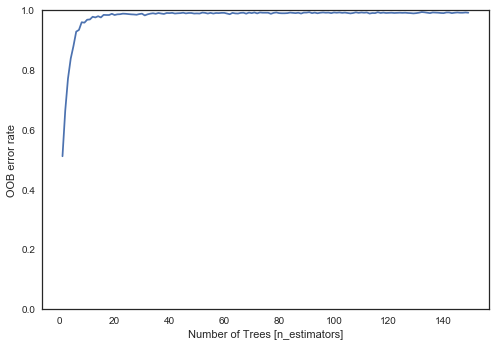

In [23]:
n_estimators = 150
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 
    
    
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob


plt.plot(trees, oob)

plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/ins_alldata_6000_trees_oob.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [24]:
model = RandomForestClassifier(n_estimators=20, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [26]:
pred = model.predict(X_test)

In [27]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Precision score of the training subset: 0.994
Accuracy score of the training subset: 0.994


In [28]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
labels = pd.DataFrame(y_test)

In [29]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [30]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [31]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Variant      320
Heterozygous_Variant    394
Homozygous_Reference    241
dtype: int64

In [32]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Variant      315
Heterozygous_Variant    398
Homozygous_Reference    242
dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[393   1   0]
 [  0 241   0]
 [  5   0 315]]


In [34]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,393,1,0,394
Homozygous_Reference,0,241,0,241
Homozygous_Variant,5,0,315,320
All,398,242,315,955


In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.99      1.00      0.99       394
Homozygous_Reference       1.00      1.00      1.00       241
  Homozygous_Variant       1.00      0.98      0.99       320

         avg / total       0.99      0.99      0.99       955



***
Predict

Predict labels for test set
***

** Load Data **

In [36]:
df_test_size.drop(['GTcons'],axis=1, inplace=True)
X2 = df_test_size

** Impute missing values using KNN **

In [37]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/1039 with 2 missing, elapsed time: 0.847
Imputing row 101/1039 with 3 missing, elapsed time: 0.856
Imputing row 201/1039 with 1 missing, elapsed time: 0.871
Imputing row 301/1039 with 3 missing, elapsed time: 0.883
Imputing row 401/1039 with 3 missing, elapsed time: 0.895
Imputing row 501/1039 with 2 missing, elapsed time: 0.906
Imputing row 601/1039 with 1 missing, elapsed time: 0.924
Imputing row 701/1039 with 3 missing, elapsed time: 0.936
Imputing row 801/1039 with 2 missing, elapsed time: 0.946
Imputing row 901/1039 with 2 missing, elapsed time: 0.958
Imputing row 1001/1039 with 2 missing, elapsed time: 0.974


In [38]:
df_test_header = list(df_test_size.columns.values)
X2.columns = df_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,977.521739,7.329924,23.0,417.173913,82.969168,23.0,0.0,888.705882,166.366450,170.0,...,11649.10345,4516.179216,29.0,0.0,0.0,0.0,0.0,2986553.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,873.616352,161.479434,159.0,...,10858.17647,4360.693980,51.0,0.0,0.0,0.0,0.0,33972943.0,1.0,1.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,879.656051,164.646068,157.0,...,10686.04651,4080.610431,43.0,0.0,0.0,0.0,0.0,55880548.0,1.0,1.0


In [39]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,977.521739,7.329924,23.0,417.173913,82.969168,23.0,0.0,888.705882,166.366450,170.0,...,11649.10345,4516.179216,29.0,0.0,0.0,0.0,0.0,2986553.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,873.616352,161.479434,159.0,...,10858.17647,4360.693980,51.0,0.0,0.0,0.0,0.0,33972943.0,1.0,1.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,879.656051,164.646068,157.0,...,10686.04651,4080.610431,43.0,0.0,0.0,0.0,0.0,55880548.0,1.0,1.0


In [40]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [41]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [42]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_size_2['chrom']
X5['GTcons'] = df_test_size_2['GTcons']
X5['start'] = df_test_size_2['start']
X5['end'] = df_test_size_2['end']
X5['Size'] = df_test_size_2['Size']
X5['GTsupp'] = df_test_size_2['GTsupp']

In [43]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/size_samp/df_size_sampTest_df1.csv', index=False)

In [59]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/size_samp/df_size_sampTest_df1.csv')

In [60]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [61]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/size_samp/df_size_sampTest_df2.csv', index=False)

In [62]:
X6['GTcons'].dtypes

dtype('int64')

In [63]:
# Drop NaN Labels
X6 = X6[np.isfinite(X6['GTcons'])]
X6 = X6[np.isfinite(X6['predicted_GTcons_label'])]

***
Label Analysis
***

In [64]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[290   3   0]
 [  2 453   4]
 [  2  10 275]]


In [65]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [66]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.980
Accuracy score of the prediction subset: 0.980


In [67]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,453,2,4,459
Homozygous_Reference,3,290,0,293
Homozygous_Variant,10,2,275,287
All,466,294,279,1039


In [68]:
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/size_samp/Test_SizeSamp_All_confMatrix.csv')

** Labels with Pred_Prob >=0.9 **

In [69]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]

In [70]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,412,0,0,412
Homozygous_Reference,0,245,0,245
Homozygous_Variant,0,0,238,238
All,412,245,238,895


In [71]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/size_samp/Test_SizeSamp_All_confMatrix_hi.csv')

In [72]:
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       412
Homozygous_Reference       1.00      1.00      1.00       245
  Homozygous_Variant       1.00      1.00      1.00       238

         avg / total       1.00      1.00      1.00       895



***
Size Separate Label Analysis
***

In [73]:
#Size Bins
bins = [0, 50, 100,300,400,1000,5999,45516]
X6['Size'] = X6['Size'].abs()
group_names_size = ['0-50', '50-100', '100-300', '300-400', '400-1000', '1000-5999', '6000+']
X6['size_bin'] = pd.cut(X6['Size'], bins, labels=group_names_size)

#Separate dataframes based on size_bin
df_20to50 = X6[X6['size_bin'].str.contains('0-50')]
df_50to100 = X6[X6['size_bin'].str.contains('50-100')]
df_100to300 = X6[X6['size_bin'].str.contains('100-300')]
df_300to400 = X6[X6['size_bin'].str.contains('300-400')]
df_400to1000 = X6[X6['size_bin'].str.contains('400-1000')]
df_1000to6000 = X6[X6['size_bin'].str.contains('1000-5999')]
df_6000 = X6[X6['size_bin'].str.contains('6000+')]

In [74]:
#Confusion Matrices
consensus_GT = df_20to50['GTcons']
predict = df_20to50['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,93,0,0,93
Homozygous_Reference,0,61,0,61
Homozygous_Variant,1,0,45,46
All,94,61,45,200


In [78]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.995
Accuracy score of the prediction subset: 0.995


In [81]:
consensus_GT = df_50to100['GTcons']
predict = df_50to100['predicted_GTcons_label']
print('df_50to100')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_50to100


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,95,1,0,96
Homozygous_Reference,0,47,0,47
Homozygous_Variant,0,0,57,57
All,95,48,57,200


In [82]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.995
Accuracy score of the prediction subset: 0.995


In [83]:
consensus_GT = df_100to300['GTcons']
predict = df_100to300['predicted_GTcons_label']
print('df_100to300')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_100to300


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,84,0,1,85
Homozygous_Reference,2,61,0,63
Homozygous_Variant,0,0,52,52
All,86,61,53,200


In [84]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.985
Accuracy score of the prediction subset: 0.985


In [85]:
consensus_GT = df_300to400['GTcons']
predict = df_300to400['predicted_GTcons_label']
print('df_300to400')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_300to400


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,103,1,1,105
Homozygous_Reference,0,55,0,55
Homozygous_Variant,2,0,36,38
All,105,56,37,198


In [86]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.980
Accuracy score of the prediction subset: 0.980


In [87]:
consensus_GT = df_400to1000['GTcons']
predict = df_400to1000['predicted_GTcons_label']
print('df_400to1000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_400to1000


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,43,0,0,43
Homozygous_Reference,1,40,0,41
Homozygous_Variant,2,1,56,59
All,46,41,56,143


In [88]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.972
Accuracy score of the prediction subset: 0.972


In [89]:
consensus_GT = df_1000to6000['GTcons']
predict = df_1000to6000['predicted_GTcons_label']
print('df_1000to6000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_1000to6000


Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,34,0,1,35
Homozygous_Reference,0,26,0,26
Homozygous_Variant,4,1,27,32
All,38,27,28,93


In [90]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.935
Accuracy score of the prediction subset: 0.935


In [91]:
consensus_GT = df_6000['GTcons']
predict = df_6000['predicted_GTcons_label']
print('df_6000')
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

df_6000


Predicted,Heterozygous_Variant,Homozygous_Variant,All
True,,,
Heterozygous_Variant,1,1,2
Homozygous_Variant,1,2,3
All,2,3,5


In [92]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.600
Accuracy score of the prediction subset: 0.600


In [93]:
#Calculate average pred prob for each group
df_20to50_homVar = df_20to50[df_20to50['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_20to50_hetVar = df_20to50[df_20to50['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_20to50_homRef = df_20to50[df_20to50['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_20to50_homVar.mean()
df_20to50_hetVar.mean()
df_20to50_homRef.mean()
print('20 to 50 bp Hom Var {}'.format(df_20to50_homVar.mean())) 
print('20 to 50 bp Het Var {}'.format(df_20to50_hetVar.mean())) 
print('20 to 50 bp Hom Ref {}'.format(df_20to50_homRef.mean())) 

df_50to100_homVar = df_50to100[df_50to100['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_50to100_hetVar = df_50to100[df_50to100['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_50to100_homRef = df_50to100[df_50to100['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_50to100_homVar.mean()
df_50to100_hetVar.mean()
df_50to100_homRef.mean()
print('50to100 bp Hom Var {}'.format(df_50to100_homVar.mean())) 
print('50to100 bp Het Var {}'.format(df_50to100_hetVar.mean())) 
print('50to100 bp Hom Ref {}'.format(df_50to100_homRef.mean())) 

df_100to300_homVar = df_100to300[df_100to300['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_100to300_hetVar = df_100to300[df_100to300['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_100to300_homRef = df_100to300[df_100to300['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_100to300_homVar.mean()
df_100to300_hetVar.mean()
df_100to300_homRef.mean()
print('100to300 bp Hom Var {}'.format(df_100to300_homVar.mean())) 
print('100to300 bp Het Var {}'.format(df_100to300_hetVar.mean())) 
print('100to300 bp Hom Ref {}'.format(df_100to300_homRef.mean())) 

df_300to400_homVar = df_300to400[df_300to400['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_300to400_hetVar = df_300to400[df_300to400['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_300to400_homRef = df_300to400[df_300to400['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_300to400_homVar.mean()
df_300to400_hetVar.mean()
df_300to400_homRef.mean()
print('300to400 bp Hom Var {}'.format(df_300to400_homVar.mean())) 
print('300to400 bp Het Var {}'.format(df_300to400_hetVar.mean())) 
print('300to400 bp Hom Ref {}'.format(df_300to400_homRef.mean())) 

df_400to1000_homVar = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_400to1000_hetVar = df_400to1000[df_400to1000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_400to1000_homRef = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_400to1000_homVar.mean()
df_400to1000_hetVar.mean()
df_400to1000_homRef.mean()
print('400to1000 bp Hom Var {}'.format(df_400to1000_homVar.mean())) 
print('400to1000 bp Het Var {}'.format(df_400to1000_hetVar.mean())) 
print('400to1000 bp Hom Ref {}'.format(df_400to1000_homRef.mean())) 

df_1000to6000_homVar = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_1000to6000_hetVar = df_1000to6000[df_1000to6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_1000to6000_homRef = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_1000to6000_homVar.mean()
df_1000to6000_hetVar.mean()
df_1000to6000_homRef.mean()
print('1000to6000 bp Hom Var {}'.format(df_1000to6000_homVar.mean())) 
print('1000to6000 bp Het Var {}'.format(df_1000to6000_hetVar.mean())) 
print('1000to6000 bp Hom Ref {}'.format(df_1000to6000_homRef.mean())) 

df_6000_homVar = df_6000[df_6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_6000_hetVar = df_6000[df_6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_6000_homRef = df_6000[df_6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_6000_homVar.mean()
df_6000_hetVar.mean()
df_6000_homRef.mean()
print('6000 bp Hom Var {}'.format(df_6000_homVar.mean())) 
print('6000 bp Het Var {}'.format(df_6000_hetVar.mean())) 
print('6000 bp Hom Ref {}'.format(df_6000_homRef.mean())) 

20 to 50 bp Hom Var 0.9445652173913043
20 to 50 bp Het Var 0.9752688172043014
20 to 50 bp Hom Ref 0.9680327868852461
50to100 bp Hom Var 0.9657894736842108
50to100 bp Het Var 0.9515625000000004
50to100 bp Hom Ref 0.9531914893617021
100to300 bp Hom Var 0.9596153846153848
100to300 bp Het Var 0.9523529411764707
100to300 bp Hom Ref 0.9373015873015875
300to400 bp Hom Var 0.9184210526315787
300to400 bp Het Var 0.9585714285714287
300to400 bp Hom Ref 0.9772727272727274
400to1000 bp Hom Var 0.8991525423728816
400to1000 bp Het Var 0.9418604651162791
400to1000 bp Hom Ref 0.9268292682926831
1000to6000 bp Hom Var 0.8312499999999999
1000to6000 bp Het Var 0.9514285714285714
1000to6000 bp Hom Ref 0.8423076923076922
6000 bp Hom Var 0.8166666666666668
6000 bp Het Var 0.625
6000 bp Hom Ref nan


In [94]:
# Minus 1 Analysis
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/6000_train/dataframes/df_alldata_6000_min1_df2.csv')

In [95]:
#Size Bins
bins = [0, 50, 100,300,400,1000,5999,45516]
X6['Size'] = X6['Size'].abs()
group_names_size = ['0-50', '50-100', '100-300', '300-400', '400-1000', '1000-5999', '6000+']
X6['size_bin'] = pd.cut(X6['Size'], bins, labels=group_names_size)


X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

X6['GTcons'] = X6['predicted_GTcons_label']

#Separate dataframes based on size_bin
df_20to50 = X6[X6['size_bin'].str.contains('0-50')]
df_50to100 = X6[X6['size_bin'].str.contains('50-100')]
df_100to300 = X6[X6['size_bin'].str.contains('100-300')]
df_300to400 = X6[X6['size_bin'].str.contains('300-400')]
df_400to1000 = X6[X6['size_bin'].str.contains('400-1000')]
df_1000to6000 = X6[X6['size_bin'].str.contains('1000-5999')]

In [96]:
pd.value_counts(X6['size_bin'].values, sort=True)

1000-5999    586
400-1000     367
100-300      352
50-100       334
0-50         279
300-400      130
6000+          1
dtype: int64

In [97]:
#Calculate average pred prob for each group
df_20to50_homVar = df_20to50[df_20to50['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_20to50_hetVar = df_20to50[df_20to50['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_20to50_homRef = df_20to50[df_20to50['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_20to50_homVar.mean()
df_20to50_hetVar.mean()
df_20to50_homRef.mean()
print('20 to 50 bp Hom Var {}'.format(df_20to50_homVar.mean())) 
print('20 to 50 bp Het Var {}'.format(df_20to50_hetVar.mean())) 
print('20 to 50 bp Hom Ref {}'.format(df_20to50_homRef.mean())) 

df_50to100_homVar = df_50to100[df_50to100['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_50to100_hetVar = df_50to100[df_50to100['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_50to100_homRef = df_50to100[df_50to100['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_50to100_homVar.mean()
df_50to100_hetVar.mean()
df_50to100_homRef.mean()
print('50to100 bp Hom Var {}'.format(df_50to100_homVar.mean())) 
print('50to100 bp Het Var {}'.format(df_50to100_hetVar.mean())) 
print('50to100 bp Hom Ref {}'.format(df_50to100_homRef.mean())) 

df_100to300_homVar = df_100to300[df_100to300['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_100to300_hetVar = df_100to300[df_100to300['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_100to300_homRef = df_100to300[df_100to300['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_100to300_homVar.mean()
df_100to300_hetVar.mean()
df_100to300_homRef.mean()
print('100to300 bp Hom Var {}'.format(df_100to300_homVar.mean())) 
print('100to300 bp Het Var {}'.format(df_100to300_hetVar.mean())) 
print('100to300 bp Hom Ref {}'.format(df_100to300_homRef.mean())) 

df_300to400_homVar = df_300to400[df_300to400['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_300to400_hetVar = df_300to400[df_300to400['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_300to400_homRef = df_300to400[df_300to400['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_300to400_homVar.mean()
df_300to400_hetVar.mean()
df_300to400_homRef.mean()
print('300to400 bp Hom Var {}'.format(df_300to400_homVar.mean())) 
print('300to400 bp Het Var {}'.format(df_300to400_hetVar.mean())) 
print('300to400 bp Hom Ref {}'.format(df_300to400_homRef.mean())) 

df_400to1000_homVar = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_400to1000_hetVar = df_400to1000[df_400to1000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_400to1000_homRef = df_400to1000[df_400to1000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_400to1000_homVar.mean()
df_400to1000_hetVar.mean()
df_400to1000_homRef.mean()
print('400to1000 bp Hom Var {}'.format(df_400to1000_homVar.mean())) 
print('400to1000 bp Het Var {}'.format(df_400to1000_hetVar.mean())) 
print('400to1000 bp Hom Ref {}'.format(df_400to1000_homRef.mean())) 

df_1000to6000_homVar = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Variant']['Homozygous_Variant_GTcons']
df_1000to6000_hetVar = df_1000to6000[df_1000to6000['GTcons'] == 'Heterozygous_Variant']['Heterozygous_Variant_GTcons']
df_1000to6000_homRef = df_1000to6000[df_1000to6000['GTcons'] == 'Homozygous_Reference']['Homozygous_Reference_GTcons']

df_1000to6000_homVar.mean()
df_1000to6000_hetVar.mean()
df_1000to6000_homRef.mean()
print('1000to6000 bp Hom Var {}'.format(df_1000to6000_homVar.mean())) 
print('1000to6000 bp Het Var {}'.format(df_1000to6000_hetVar.mean())) 
print('1000to6000 bp Hom Ref {}'.format(df_1000to6000_homRef.mean())) 

20 to 50 bp Hom Var 0.7948818897637798
20 to 50 bp Het Var 0.7307692307692308
20 to 50 bp Hom Ref 0.7283783783783782
50to100 bp Hom Var 0.7782178217821785
50to100 bp Het Var 0.7436936936936934
50to100 bp Hom Ref 0.7282786885245902
100to300 bp Hom Var 0.8045081967213119
100to300 bp Het Var 0.7812500000000003
100to300 bp Hom Ref 0.7559859154929577
300to400 bp Hom Var 0.8590163934426228
300to400 bp Het Var 0.7400000000000001
300to400 bp Hom Ref 0.7926470588235294
400to1000 bp Hom Var 0.8111111111111118
400to1000 bp Het Var 0.6934782608695651
400to1000 bp Hom Ref 0.7846625766871161
1000to6000 bp Hom Var 0.7611111111111108
1000to6000 bp Het Var 0.7240384615384621
1000to6000 bp Hom Ref 0.7282511210762328
